In [1]:
import pandas as pd
import math
from decimal import *
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
def bin_prob1(n, p, k):
    arr = math.factorial(n) / math.factorial(k) / math.factorial(n - k)
    bp = arr * (p ** k) * ((1 - p) ** (n - k))
    return bp

In [3]:
def bin_prob2(n, p, k):
    arr = math.factorial(n) // math.factorial(k) // math.factorial(n - k)
    bp = arr * (p ** k) * ((1 - p) ** (n - k))
    return bp

In [4]:
def bin_prob(n, p, k):
    # instantiate a Decimal context
    ctx = Context()
    # Python can make arbitrarily large integers, limited only by RAM
    # Use // to keep them integer
    arr = math.factorial(n) // math.factorial(k) // math.factorial(n - k)
    bp = Decimal(arr) * ctx.power(Decimal(p), Decimal(k)) * ctx.power(Decimal(1 - p), Decimal(n - k))
    return float(bp)

In [5]:
# number of objects picked from the pile
n = 2000
# fraction of the original pile that are type A
p = 0.2
df = pd.DataFrame({'probability': [0.0] * (n + 1)})

# compute probabilities for all k
for k in tqdm(range(n + 1)):
    df.loc[k] = bin_prob(n, p, k)

In [6]:
print(df)

        probability
0     1.513471e-194
1     7.567353e-192
2     1.890892e-189
3     3.148336e-187
4     3.929516e-185
...             ...
1996   0.000000e+00
1997   0.000000e+00
1998   0.000000e+00
1999   0.000000e+00
2000   0.000000e+00

[2001 rows x 1 columns]


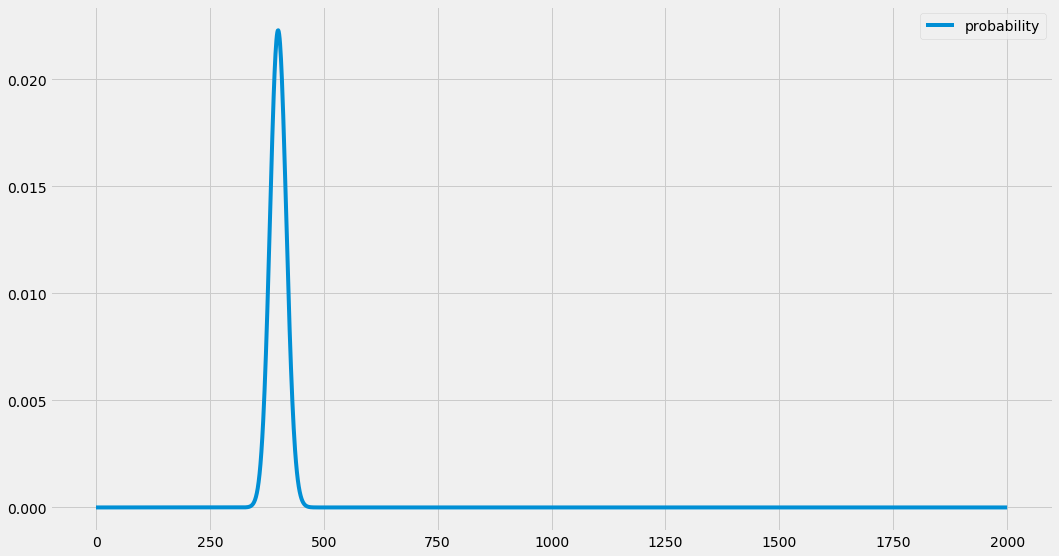

In [7]:
df.plot(figsize=(16,9));

In [8]:
dfcs = df.cumsum()
dfcs.rename(columns={'probability': 'cumulative probability'}, inplace=True)
print(dfcs)

      cumulative probability
0              1.513471e-194
1              7.582488e-192
2              1.898475e-189
3              3.167320e-187
4              3.961190e-185
...                      ...
1996            1.000000e+00
1997            1.000000e+00
1998            1.000000e+00
1999            1.000000e+00
2000            1.000000e+00

[2001 rows x 1 columns]


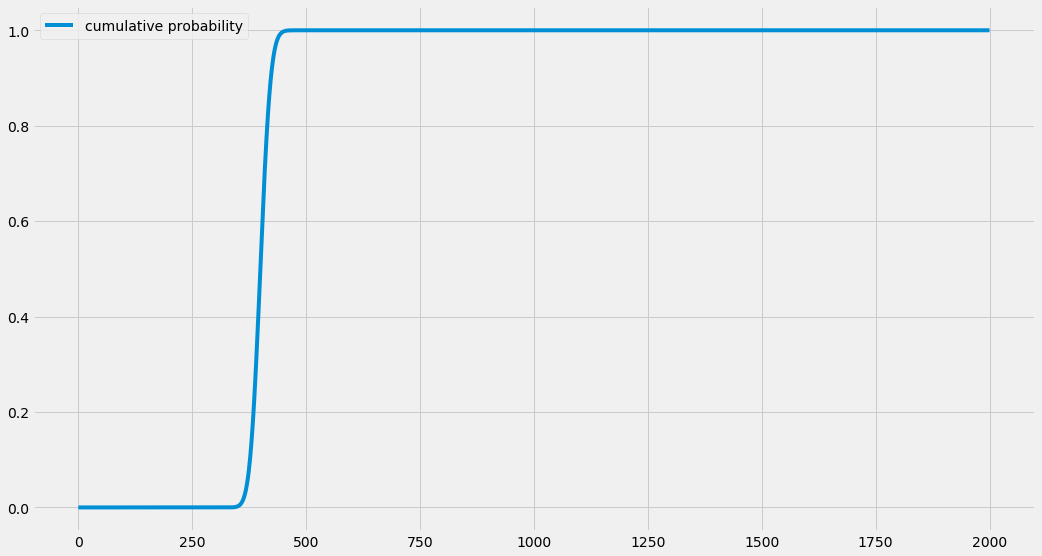

In [9]:
dfcs.plot(figsize=(16,9));

In [10]:
dfcs.loc[int(n * p)]

cumulative probability    0.513377
Name: 400, dtype: float64

If n is large enough, and p is not too extreme, the distribution is near-normal. In that case it makes sense to calculate typical stats stuff:

In [11]:
print('mean:', n * p)
print('standard deviation:', (n * p * (1 - p)) ** 0.5)

mean: 400.0
standard deviation: 17.88854381999832
